In [2]:
import h5py
import sys
import numpy as np
import matplotlib.pyplot as plt
import os
from tools import bin_data

In [30]:
# run this for 1k test---------------------------

m_mu = 105.7 #MeV
energies=[]
deposited_Es=[]
ranges=[]
path_lengths=[]
evs=[]

f = h5py.File('muon1000ev_0-1gev_edep.h5')

trajs = f['trajectories']
segs = f['segments']


primary_mask_trajs = trajs['traj_id'] == 0
muon_trajs = trajs[primary_mask_trajs] # primary muon trajectories only



for traj in muon_trajs:
    # getting event number
    ev_n = traj['event_id']
    evs.append(ev_n)
    print('----------')
    # print(f'event: {ev_n}')

    # getting energies
    KE = traj['E_start'] - m_mu
    energies.append(KE)

    # getting range ---------------
    start = traj['xyz_start']
    stop = traj['xyz_end']
    distance_vector = np.subtract(stop, start)
    length = np.linalg.norm(distance_vector) *10 #mm
    ranges.append(length)

    # getting path length -------------
    # getting segments in muon track only
    ev_mask = segs['event_id'] == ev_n #ev_mask is a boolean array, true if that segment is in that trajectory
    ev_segs = segs[ev_mask] #only segments in that event
    
    muon_mask = ev_segs['traj_id'] == 0 
    muon_segs = ev_segs[muon_mask] #only segments in primary muon track

    seg_starts = np.array([[seg['x_start'], seg['y_start'], seg['z_start']] for seg in muon_segs])
    seg_ends = np.array([[seg['x_end'], seg['y_end'], seg['z_end']] for seg in muon_segs])

    path_length = 0

    if np.any(start != seg_starts[0]):
        path_length += np.linalg.norm(start - seg_starts[0])
    elif np.any(stop != seg_ends[-1]):
        path_length += np.linalg.norm(stop - seg_ends[-1])

    for i, seg in enumerate(muon_segs):
        if i+1 == len(muon_segs):
            path_length += np.linalg.norm(seg_ends[i] - seg_starts[i]) * 10
        else:
            path_length += np.linalg.norm(seg_ends[i] - seg_starts[i]) * 10
            path_length += np.linalg.norm(seg_starts[i+1] - seg_ends[i]) * 10
    path_lengths.append(path_length * 10)

    # getting deposited energy
    deposited_E = 0
    for seg in muon_segs:
        deposited_E += seg['dE']
    deposited_Es.append(deposited_E)

np.savez('analyzed_data/estimators_truth.npz', energies=energies, naive=ranges, detailed=path_lengths, edeps=deposited_Es, evs=evs)


----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------

In [4]:
# run this for more data --------------------------------

m_mu = 105.7 #MeV
energies=[]
deposited_Es=[]
ranges=[]
path_lengths=[]
evs=[]

directory = '/sdf/data/neutrino/summer25/seohyeon/edep-sim_h5_54k_raw/'
files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
files = files[10:20]

print(files)

for filename in files:
    f = h5py.File(directory + filename)

    print(filename)
    
    trajs = f['trajectories']
    segs = f['segments']
    
    primary_mask_trajs = trajs['traj_id']== 0
    muon_trajs = trajs[primary_mask_trajs] # primary muon trajectories only
    
    for traj in muon_trajs:
        # getting event number
        ev_n = traj['event_id']
        evs.append(ev_n)
        print('----------')
        # print(f'event: {ev_n}')

        # getting energies
        KE = traj['E_start'] - m_mu
        energies.append(KE)
    
        # getting range ---------------
        start = traj['xyz_start']
        stop = traj['xyz_end']
        distance_vector = np.subtract(stop, start)
        length = np.linalg.norm(distance_vector) * 10 #mm
        ranges.append(length)
    
        # getting path length -------------
        # getting segments in muon track only
        ev_mask = segs['event_id'] == ev_n #ev_mask is a boolean array, true if that segment is in that trajectory
        ev_segs = segs[ev_mask] #only segments in that event
        primary_mask = ev_segs['traj_id'] == 0 
        muon_segs = ev_segs[primary_mask] #only segments in primary muon track

        seg_starts = np.array([[seg['x_start'], seg['y_start'], seg['z_start']] for seg in muon_segs])
        seg_ends = np.array([[seg['x_end'], seg['y_end'], seg['z_end']] for seg in muon_segs])

        path_length = 0

        if np.any(start != seg_starts[0]):
            path_length += np.linalg.norm(start - seg_starts[0])
            print('mismatch')
            print(start)
            print(seg_starts[0])
            print(len(seg_starts))
        elif np.any(stop != seg_ends[-1]):
            path_length += np.linalg.norm(stop - seg_ends[-1])
            print('mismatch')
            print(start)
            print(seg_starts[0])
            print(len(seg_starts))

        for i, seg in enumerate(muon_segs):
            if i+1 == len(muon_segs):
                path_length += np.linalg.norm(seg_ends[i] - seg_starts[i]) 
            else:
                path_length += np.linalg.norm(seg_ends[i] - seg_starts[i]) 
                path_length += np.linalg.norm(seg_starts[i+1] - seg_ends[i]) 
        path_lengths.append(path_length * 10)


        # getting deposited energy
        deposited_E = 0
        for seg in muon_segs:
            deposited_E += seg['dE']
        deposited_Es.append(deposited_E)

# np.savez('analyzed_data/estimators_truth.npz', energies=energies, naive=ranges, detailed=path_lengths, edeps=deposited_Es, evs=evs)

['muon_0-1gev_run3.h5', 'muon_0-1gev_run27.h5', 'muon_0-1gev_run24.h5', 'muon_0-1gev_run13.h5', 'muon_0-1gev_run20.h5', 'muon_0-1gev_run22.h5', 'muon_0-1gev_run16.h5', 'muon_0-1gev_run28.h5', 'muon_0-1gev_run30.h5', 'muon_0-1gev_run36.h5']
muon_0-1gev_run3.h5
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
---

KeyboardInterrupt: 

In [24]:
import importlib
import tools
importlib.reload(tools)

from tools import bin20  

In [32]:
total_evs = 54000
# range plots ------------------------------------------------------
# range vs. KE
plt.figure()
plt.plot(energies, ranges, 'o')
plt.xlabel('muon KE (MeV)')
plt.ylabel('range (cm)')
plt.title(f'range vs. muon KE, {total_evs} events')
plt.savefig(f'Plots/range_{total_evs}evs.png')
plt.close()

# histogram
plt.figure()
plt.hist2d(energies, ranges, bins=60)
plt.colorbar(label='Density')
plt.xlabel('muon KE (MeV)')
plt.ylabel('range (cm)')
plt.title(f'range vs. muon KE, {total_evs} events')
plt.savefig(f'Plots/range_hist_{total_evs}evs.png')
plt.close()

# # profile
range_bin_midpts, range_avgs, range_rms, range_relative_rms = bin20(energies, ranges)
plt.figure()
plt.errorbar(range_bin_midpts, range_avgs, range_rms, fmt='o')
plt.xlabel('muon kinetic energy (MeV)')
plt.ylabel('range (cm)')
plt.title(f'range vs. muon KE profile, {total_evs} events')
plt.savefig(f'Plots/range_profile_{total_evs}evs.png')
plt.close()

#relative rms
plt.figure()
plt.plot(range_bin_midpts, range_relative_rms, 'o')
plt.xlabel('muon KE (MeV)')
plt.ylabel('relative rms')
plt.title(f'relative variance in range vs. muon KE, {total_evs} events')
plt.savefig(f'Plots/range_rms_{total_evs}evs.png')
plt.close()


In [33]:
# path length plots---------------------------------------
# path length vs. KE
plt.figure()
plt.plot(energies, path_lengths, 'o')
plt.xlabel('muon kinetic energy (MeV)')
plt.ylabel('path length (cm)')
plt.title(f'path length vs. muon KE, {total_evs} events')
plt.savefig(f'Plots/path_length_{total_evs}evs.png')
plt.close()

# histogram
plt.figure()
plt.hist2d(energies, path_lengths, bins=60)
plt.colorbar(label='Density')
plt.xlabel('muon KE (MeV)')
plt.ylabel('path length (cm)')
plt.title(f'path length vs. muon KE, {total_evs} events')
plt.savefig(f'Plots/path_length_hist_{total_evs}evs.png')
plt.close()

# profile
pl_bin_midpts, pl_avgs, pl_rms, pl_relative_rms = bin20(energies, path_lengths)
plt.figure()
plt.errorbar(pl_bin_midpts, pl_avgs, pl_rms, fmt='o')
plt.xlabel('muon kinetic energy (MeV)')
plt.ylabel('path length (cm)')
plt.title(f'path length vs. muon KE profile, {total_evs} events')
plt.savefig(f'Plots/path_length_profile_{total_evs}evs.png')
plt.close()

# relative rms
# relative rms is calculated relative to average path length of that bin. but that is ~proportional to muon KE?
plt.figure()
plt.plot(pl_bin_midpts, pl_relative_rms, 'o')
plt.xlabel('muon KE (MeV)')
plt.ylabel('relative rms')
plt.title(f'relative variance in path length vs. muon KE, {total_evs} events')
plt.savefig(f'Plots/path_length_rms_{total_evs}evs.png')
plt.close()


In [38]:
# energy deposition plots----------------------------------------------
#energy deposited vs. initial KE
plt.figure()
plt.plot(energies, deposited_Es, 'o')
plt.xlabel('muon kinetic energy (MeV)')
plt.ylabel('deposited E (MeV)')
plt.title(f'deposited energy vs. muon KE, {total_evs} events')
plt.savefig(f'Plots/energy_deposited_{total_evs}evs.png')
plt.close()

# histogram
plt.figure()
plt.hist2d(energies, deposited_Es, bins=60)
plt.colorbar(label='Density')
plt.xlabel('muon KE (MeV)')
plt.ylabel('deposited E (MeV)')
plt.title(f'deposited E vs. muon KE, {total_evs} events')
plt.savefig(f'Plots/energy_deposited_hist_{total_evs}evs.png')
plt.close()

#profile
KE_bin_midpts, KE_avgs, KE_rms, KE_relative_rms = bin20(energies, deposited_Es)
plt.figure()
plt.errorbar(KE_bin_midpts, KE_avgs, KE_rms, fmt='o')
plt.xlabel('muon KE (MeV)')
plt.ylabel('deposited E (MeV)')
plt.title(f'deposited energy vs. muon KE profile, {total_evs} events')
plt.savefig(f'Plots/energy_deposited_profile_{total_evs}evs.png')
plt.close()

#relative rms
plt.figure()
plt.plot(KE_bin_midpts, KE_relative_rms, 'o')
plt.xlabel('muon KE (MeV)')
plt.ylabel('relative rms')
plt.title(f'relative variance in deposted energy vs. muon KE, {total_evs} events')
plt.savefig(f'Plots/energy_deposited_rms_{total_evs}evs.png')
plt.close()

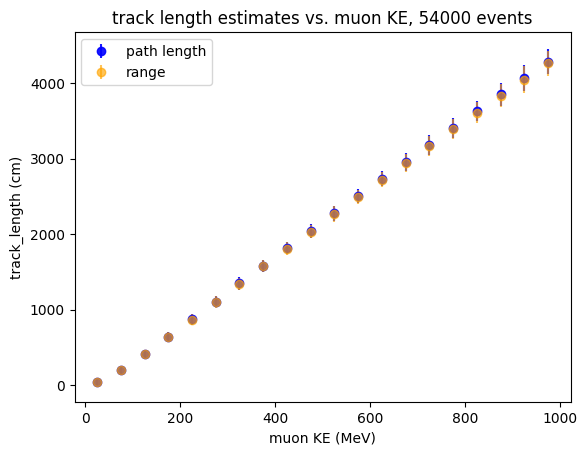

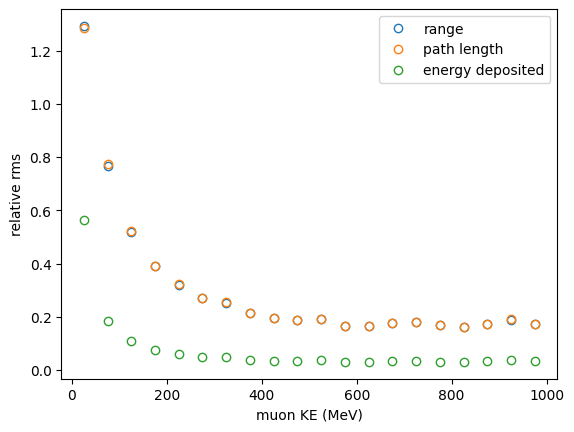

In [39]:
# comparison plots----------------------------------------
# range & path length vs. KE
plt.figure()
plt.errorbar(pl_bin_midpts, pl_avgs, pl_rms, fmt='o', color='blue', alpha=0.9, label='path length')
plt.errorbar(range_bin_midpts, range_avgs, range_rms, fmt='o', color='orange', alpha=0.65, label='range')
plt.xlabel('muon KE (MeV)')
plt.ylabel('track_length (cm)')
plt.title(f'track length estimates vs. muon KE, {total_evs} events')
plt.legend()
plt.savefig(f'Plots/length_estimates_{total_evs}evs.png')

# rms comparison
KE_bin_midpts, KE_avgs, KE_rms, KE_relative_rms = bin20(energies, deposited_Es)
plt.figure()
plt.plot(range_bin_midpts, range_relative_rms, 'o', label='range', markerfacecolor='none')
plt.plot(pl_bin_midpts, pl_relative_rms, 'o', label='path length', markerfacecolor='none')
plt.plot(KE_bin_midpts, KE_relative_rms, 'o', label='energy deposited', markerfacecolor='none') 
plt.xlabel('muon KE (MeV)')
plt.ylabel('relative rms')
plt.legend()
plt.savefig(f'Plots/rms_comparison_{total_evs}evs.png')